In [1]:
import tensorflow as tf
from tensorflow import keras

In [2]:
import numpy as np
import matplotlib.pyplot as plt

In [3]:
print(tf.__version__)

2.1.0


In [5]:
fashion_mnist = keras.datasets.fashion_mnist


(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

4423680/4422102 [==============================] - 14s 3us/step


In [6]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

In [8]:
#explore data

In [9]:
train_images.shape

(60000, 28, 28)

In [11]:
len(train_labels)

60000

In [12]:
train_labels

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

In [13]:
test_images.shape

(10000, 28, 28)

In [14]:
len(test_labels)

10000

In [15]:
# Preprocess the data

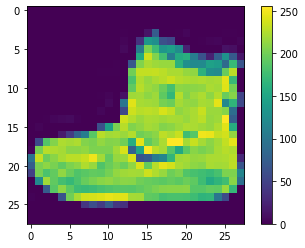

In [16]:
plt.figure()
plt.imshow(train_images[0])
plt.colorbar()
plt.grid(False)
plt.show()

In [17]:
# Scale values to range of 0 to 1

In [18]:
train_images = train_images / 255.0
test_images = test_images / 255.0

In [19]:
# display images

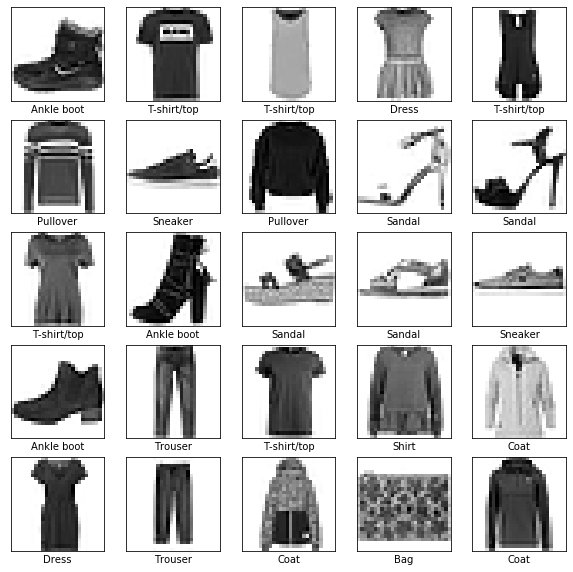

In [20]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])
plt.show()

In [21]:
# Build model

In [23]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(10)
])

In [24]:
# Compile Model with loss function, optimizer, and metrics

In [25]:
model.compile(optimizer='adam',
             loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
             metrics=['accuracy'])

In [26]:
# Start training

In [28]:
model.fit(train_images, train_labels, epochs=10)

Train on 60000 samples
Epoch 1/10
60000/60000 [==============================] - 3s 48us/sample - loss: 0.5028 - accuracy: 0.8236
Epoch 2/10
60000/60000 [==============================] - 3s 45us/sample - loss: 0.3751 - accuracy: 0.8648
Epoch 3/10
60000/60000 [==============================] - 3s 42us/sample - loss: 0.3350 - accuracy: 0.8780
Epoch 4/10
60000/60000 [==============================] - 3s 46us/sample - loss: 0.3125 - accuracy: 0.8852
Epoch 5/10
60000/60000 [==============================] - 3s 47us/sample - loss: 0.2968 - accuracy: 0.8916
Epoch 6/10
60000/60000 [==============================] - 3s 44us/sample - loss: 0.2813 - accuracy: 0.8960
Epoch 7/10
60000/60000 [==============================] - 3s 42us/sample - loss: 0.2681 - accuracy: 0.9018
Epoch 8/10
60000/60000 [==============================] - 3s 44us/sample - loss: 0.2573 - accuracy: 0.9043
Epoch 9/10
60000/60000 [==============================] - 3s 49us/sample - loss: 0.2499 - accuracy: 0.9061
Epoch 10/10
60

In [29]:
# Evaluate accuracy

In [30]:
test_loss, test_acc = model.evaluate(test_images, test_labels, verbose=2)
print('\nTest accuracy:', test_acc)

10000/10000 - 0s - loss: 0.3503 - accuracy: 0.8783

Test accuracy: 0.8783


In [31]:
# Make predictions

In [32]:
probability_model = tf.keras.Sequential([model,
                                        tf.keras.layers.Softmax()])

In [33]:
predictions = probability_model.predict(test_images)

In [34]:
predictions[0]

array([9.7715099e-07, 4.6660315e-10, 7.2213493e-07, 7.5851849e-09,
       7.4775826e-08, 8.5706555e-04, 4.5918350e-06, 7.8326259e-03,
       1.2178622e-06, 9.9130273e-01], dtype=float32)

In [35]:
np.argmax(predictions[0])

9

In [36]:
test_labels[0]

9

In [37]:
def plot_image(i, predictions_array, true_label, img):
  predictions_array, true_label, img = predictions_array, true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'

  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
  predictions_array, true_label = predictions_array, true_label[i]
  plt.grid(False)
  plt.xticks(range(10))
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)

  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')

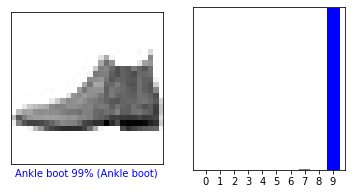

In [38]:
i = 0
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  test_labels)
plt.show()

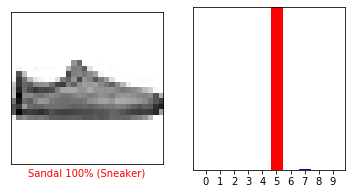

In [39]:
i = 12
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  test_labels)
plt.show()

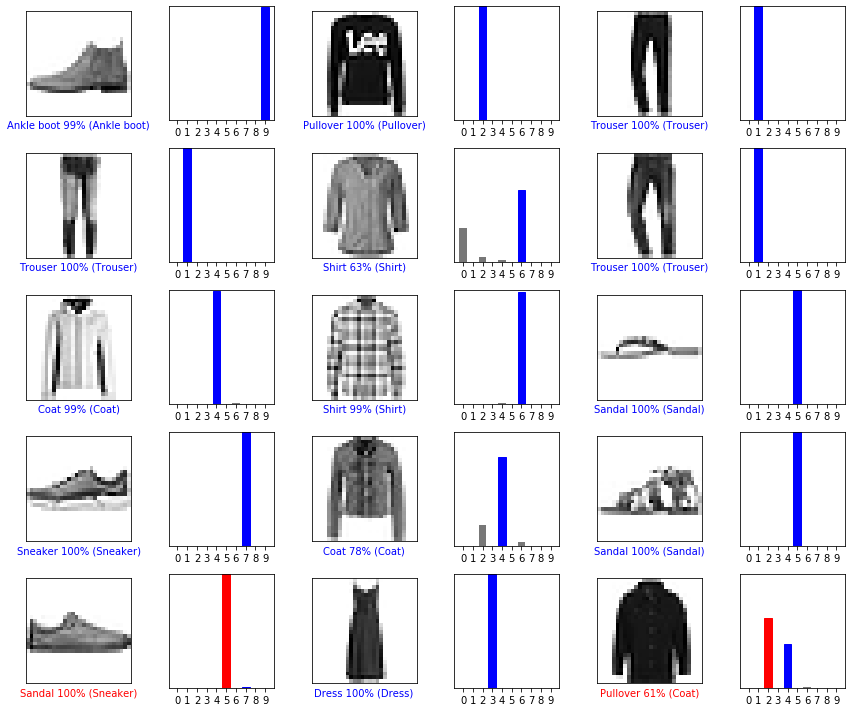

In [40]:
# Plot the first X test images, their predicted labels, and the true labels.
# Color correct predictions in blue and incorrect predictions in red.
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictions[i], test_labels, test_images)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, predictions[i], test_labels)
plt.tight_layout()
plt.show()

In [41]:
img = test_images[1]
print(img.shape)

(28, 28)


In [42]:
img = (np.expand_dims(img,0))

print(img.shape)

(1, 28, 28)


In [44]:
predictions_single = probability_model.predict(img)
print(predictions_single)

[[1.8828616e-05 5.2151877e-11 9.9970239e-01 5.6494726e-10 2.0825514e-04
  4.8459816e-11 7.0551272e-05 1.7463434e-14 2.9871416e-10 1.3966117e-15]]


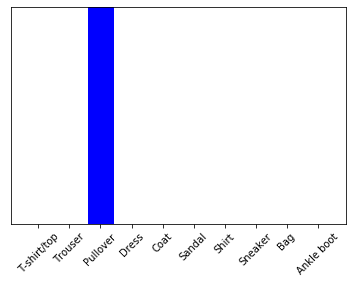

In [45]:
plot_value_array(1, predictions_single[0], test_labels)
_ = plt.xticks(range(10), class_names, rotation=45)

In [46]:
np.argmax(predictions_single[0])

2